In [4]:
# import library
import pandas as pd # import data 
import numpy as np # linear algebra 

In [5]:
# read the CSV file
df = pd.read_csv(r'C:\Users\ryanfzhang\Downloads\marketing_campaign.csv',sep='\t')

# Data Cleaning

In [7]:
# check the missing values 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Using the mean value to fill the missing value
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [9]:
# Double check 
df['Income'].isnull().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.shape

(2240, 29)

# Data Clustering 

In [13]:
df['Monetary'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df1 = df[['ID','Recency','Monetary']]
df1.head()

,ID,Recency,Monetary
0,5524,58,1617
1,2174,38,27
2,4141,26,776
3,6182,26,53
4,5324,94,422


# Pre-processing data

In [15]:
df['Education'] = df['Education'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Dt_Customer'] = df['Dt_Customer'].astype(str)

In [16]:
# import ML library
from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df['Education'] = number.fit_transform(df['Education'])
df['Marital_Status'] = number.fit_transform(df['arital_Status')
df['Dt_Customer'] = number.fit_transform(df['t_Customer')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Monetary
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,0,3,11,0,422


# Scaling data

In [17]:
X = df[["Income", "Monetary"]]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)

In [18]:
X_transformed

array([[ 0.23532677,  1.67941681],
       [-0.23582624, -0.96127545],
       [ 0.77363327,  0.28267329],
       ...,
       [ 0.18910632,  1.05495122],
       [ 0.67903514,  0.39394775],
       [ 0.02483795, -0.7204576 ]])

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6)

model.fit(X_transformed)

KMeans(n_clusters=6)

In [20]:
KMeans(n_clusters=6)

KMeans(n_clusters=6)

In [21]:
labels = model.labels_

print(labels)

[2 5 4 ... 4 4 5]


In [22]:
centers = model.cluster_centers_
centers_transformed = scaler.inverse_transform(centers)
print(scaler.inverse_transform(centers))

[[5.79157078e+04 6.24150134e+02]
 [2.48169263e+04 6.78827977e+01]
 [7.99965881e+04 1.75686331e+03]
 [6.66666000e+05 6.20000000e+01]
 [7.21520714e+04 1.09781195e+03]
 [4.41263200e+04 1.70657331e+02]]


# Data Visualization

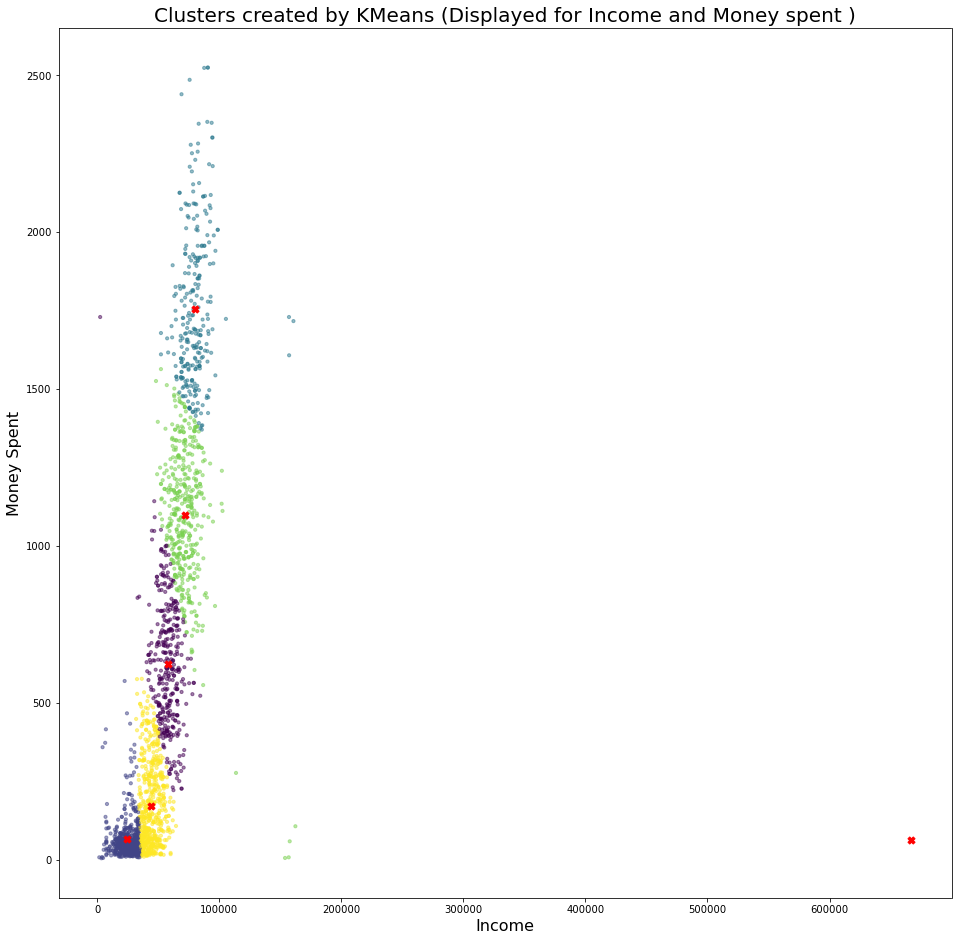

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 16))
plt.title("Clusters created by KMeans (Displayed for Income and Money spent )", fontsize = 20)
plt.xlabel("Income", fontsize = 16)
plt.ylabel("Money Spent", fontsize = 16)

plt.scatter(df["Income"], df["Monetary"], c = labels, s = 10, alpha = 0.5)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = "red", marker = "X", s = 50)
plt.show()